# Simple CNN

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
import numpy as np

In [2]:
def_base = plt.rcParams['lines.markersize']

In [3]:
def plot_stuff(l, n, inds=list(range(100)), sub_size=1, s=1, title="graph"):
    plt.figure(figsize=(20,10))
    plt.scatter(inds[:n:s],l[:n:s], label='addrs', s=(def_base*sub_size/2)**2)
    plt.xlabel('x')
    plt.title(title)
    plt.legend()

    plt.show()

# Dumping Memory Accesses

In [4]:
dump_acc = []

with open('print_test.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        dump_acc.append(int(row[0],16))

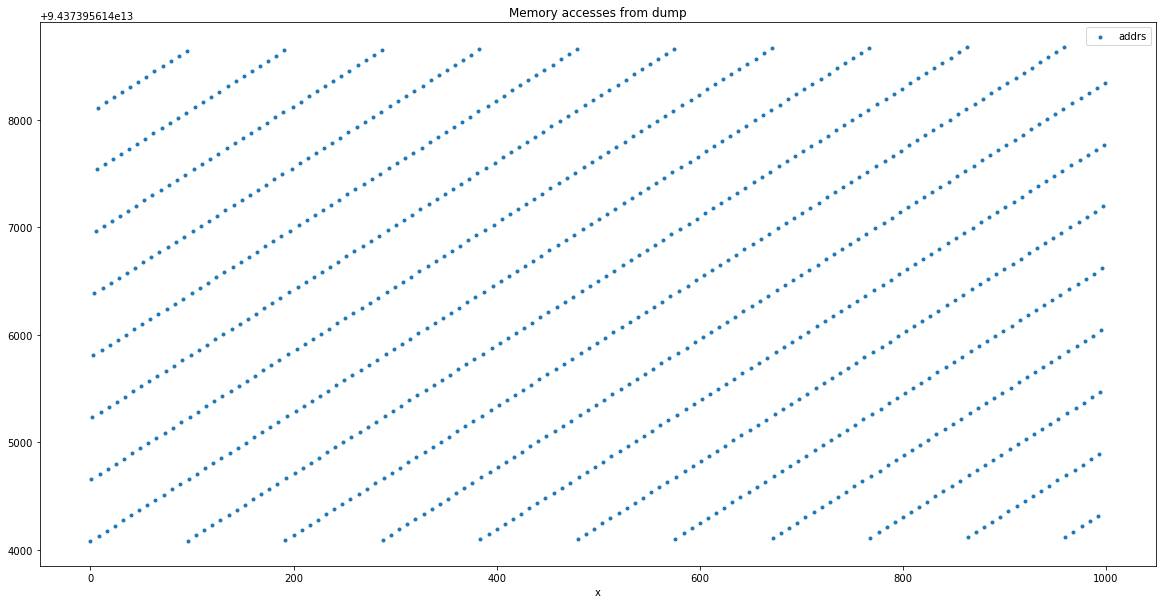

In [5]:
plot_stuff(dump_acc, 1000, inds=list(range(1000)), title='Memory accesses from dump')

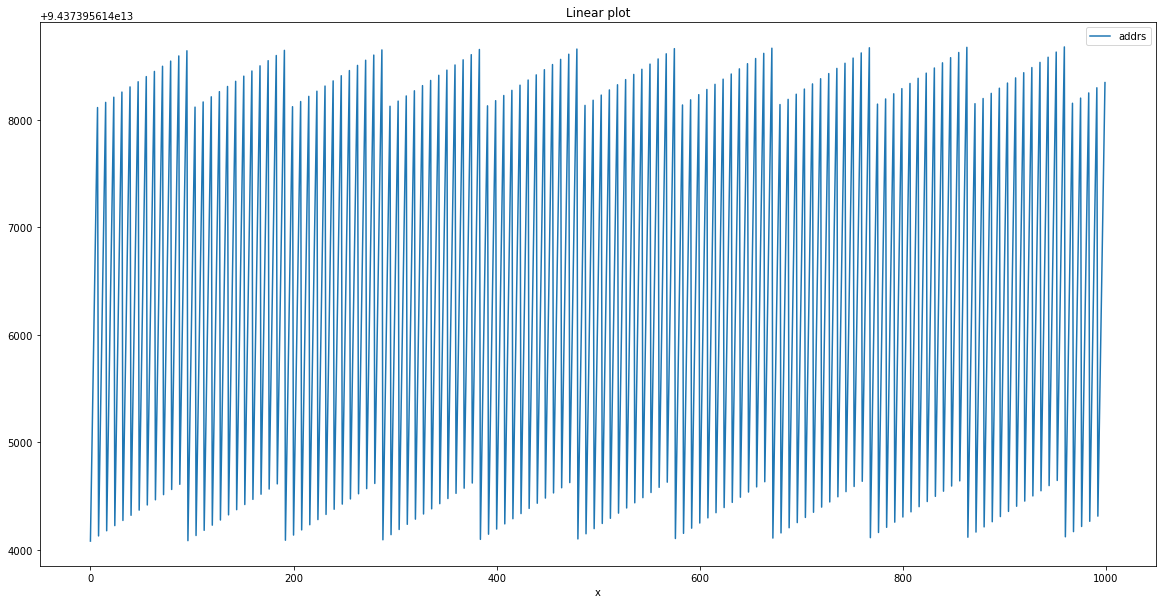

In [6]:
plt.figure(figsize=(20,10))
plt.plot(dump_acc[:1000], label='addrs')
plt.xlabel('x')
plt.title('Linear plot')
plt.legend()
plt.show()

# Pinning Memory Accesses

In [7]:
pin_acc=[]

with open('timed_test_mem.out','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        pin_acc.append(int(row[1],16))

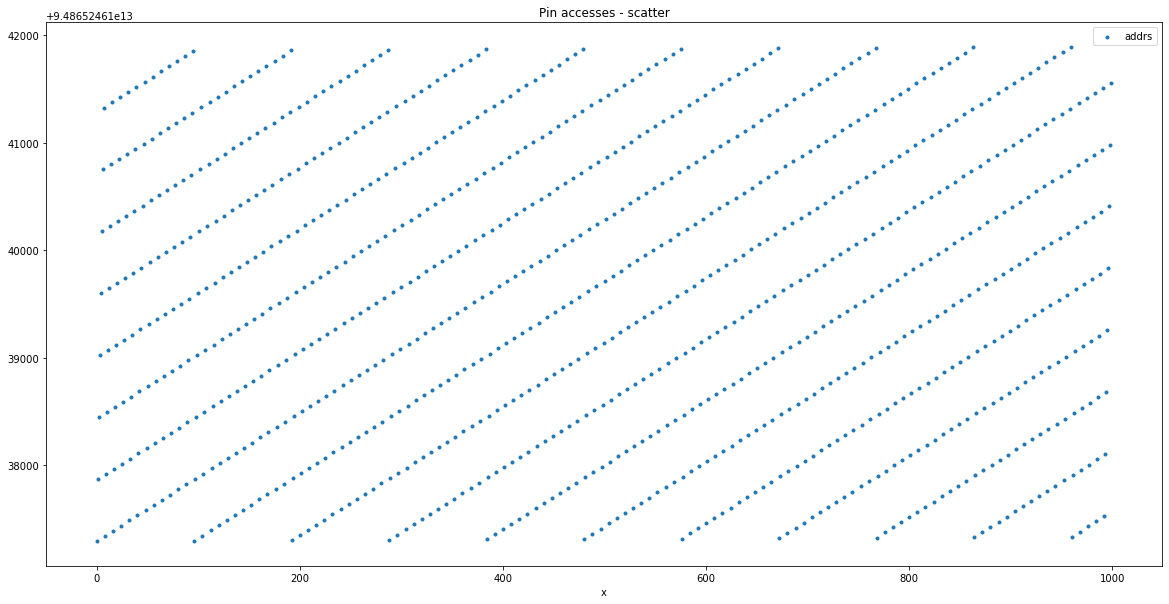

In [8]:
plot_stuff(pin_acc, 1000, inds=list(range(1000)), title='Pin accesses - scatter')

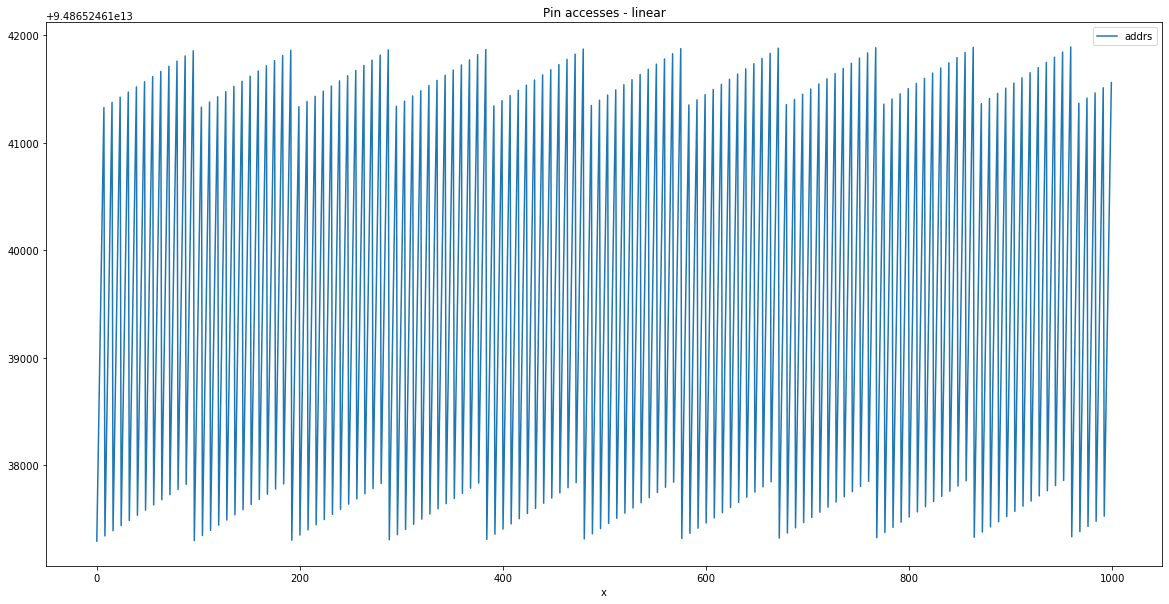

In [9]:
plt.figure(figsize=(20,10))
plt.plot(pin_acc[:1000], label='addrs')
plt.xlabel('x')
plt.title('Pin accesses - linear')
plt.legend()

plt.show()

# Better plots using Numpy

In [10]:
npin_acc = np.array(pin_acc)
npin_acc_min = npin_acc - npin_acc.min() # Subtract minimum
npin_acc_med = npin_acc - np.median(npin_acc) # Subtract median

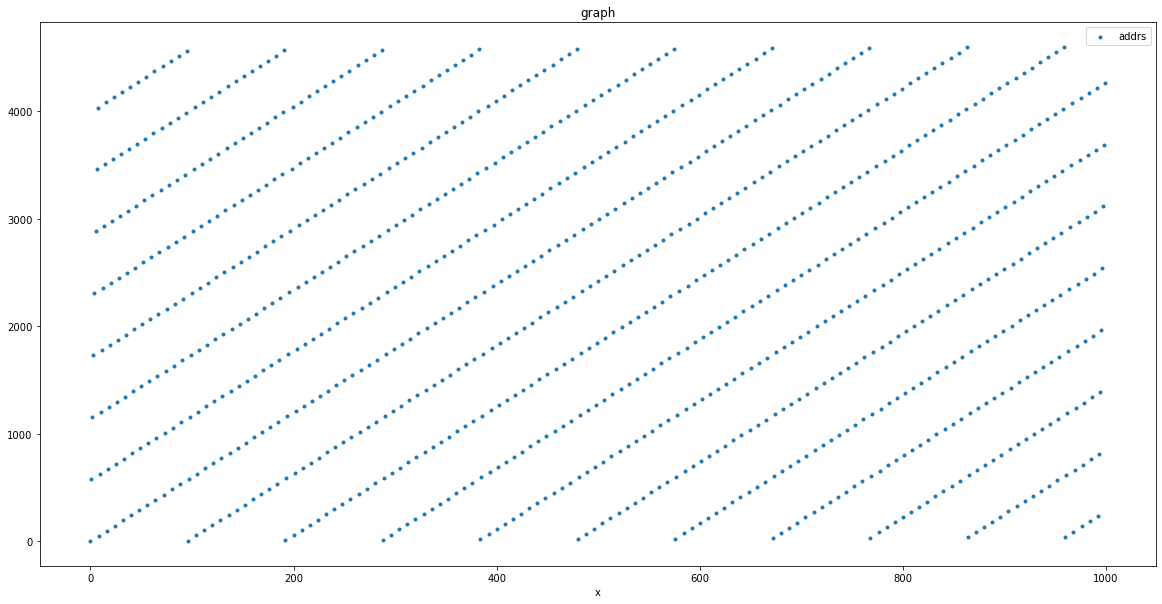

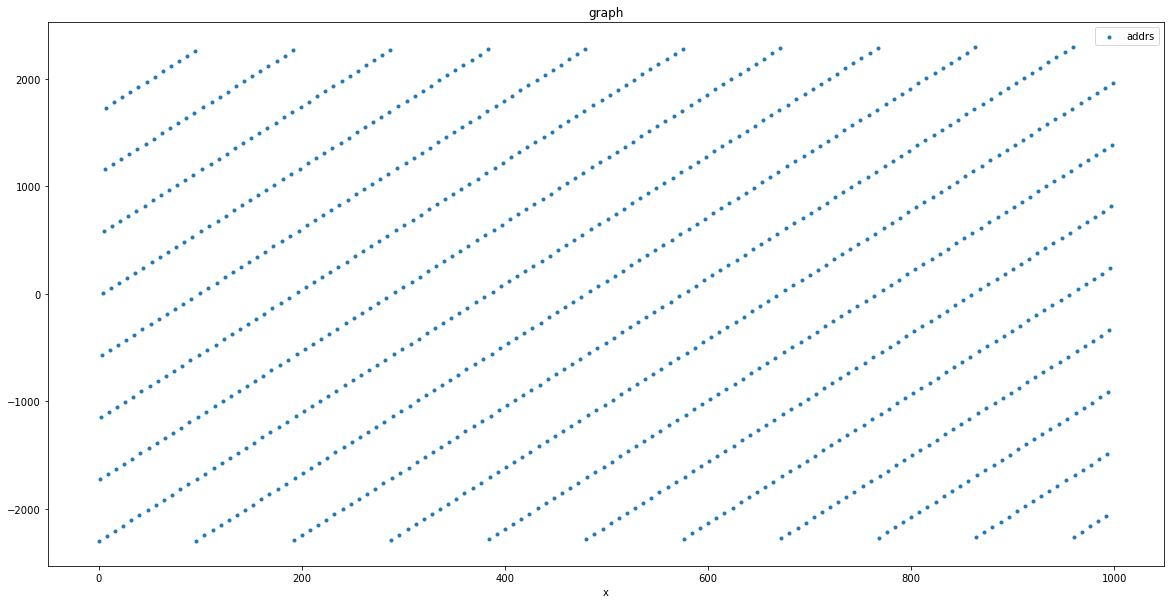

In [11]:
plot_stuff(npin_acc_min, 1000, inds=list(range(1000))) # Only y axis changes
plot_stuff(npin_acc_med, 1000, inds=list(range(1000)))

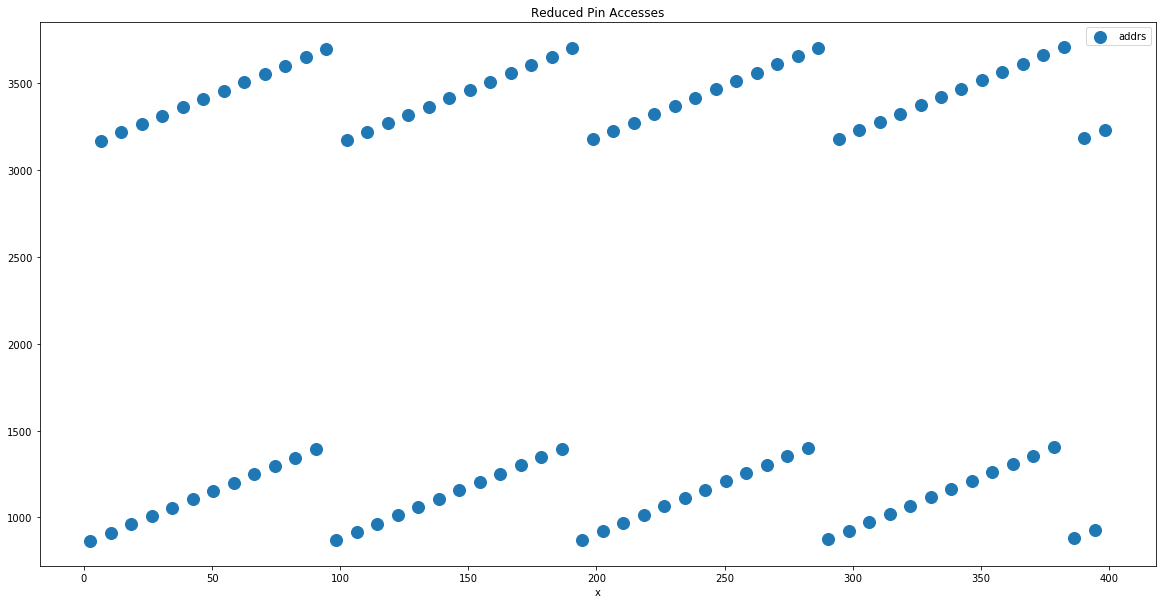

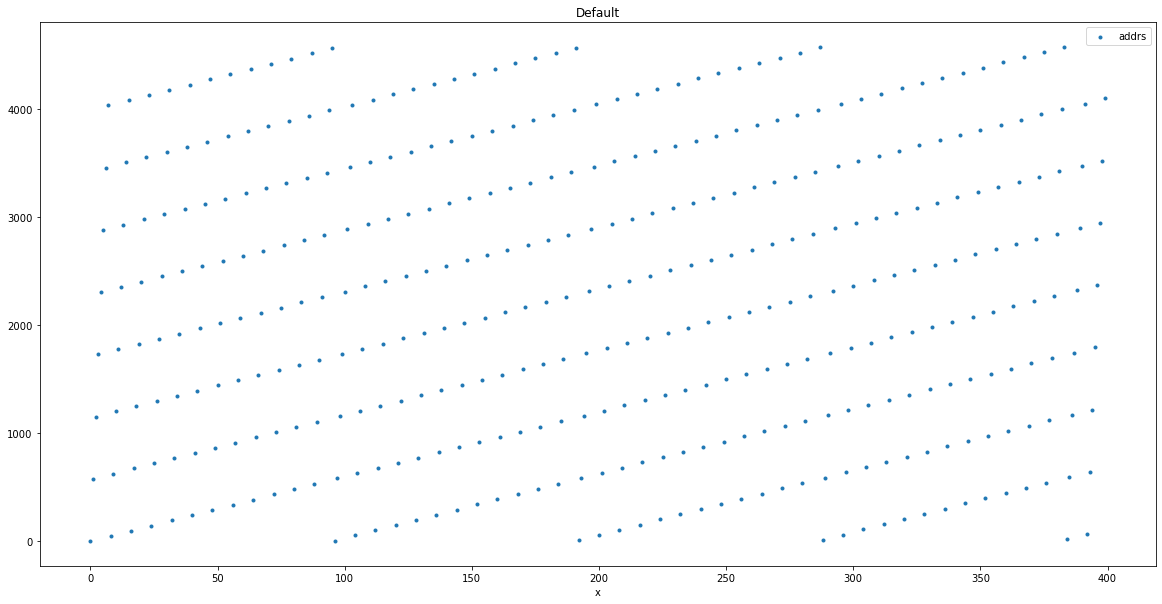

In [12]:
# Split into groups of size sub_size and take mean of each group along with their average indices/times
sub_size = 4
chunks = len(npin_acc_min)//sub_size
npin_acc_min_g = [a.mean() for a in np.array_split(npin_acc_min, chunks)]
npin_amg_inds = [a.mean() for a in np.array_split(np.arange(1,len(npin_acc_min)), chunks)]

n = 100
plot_stuff(npin_acc_min_g, n, inds=npin_amg_inds, sub_size=sub_size, title='Reduced Pin Accesses')
plot_stuff(npin_acc_min, n*sub_size, inds = list(range(n*sub_size)), sub_size=1, title='Default')

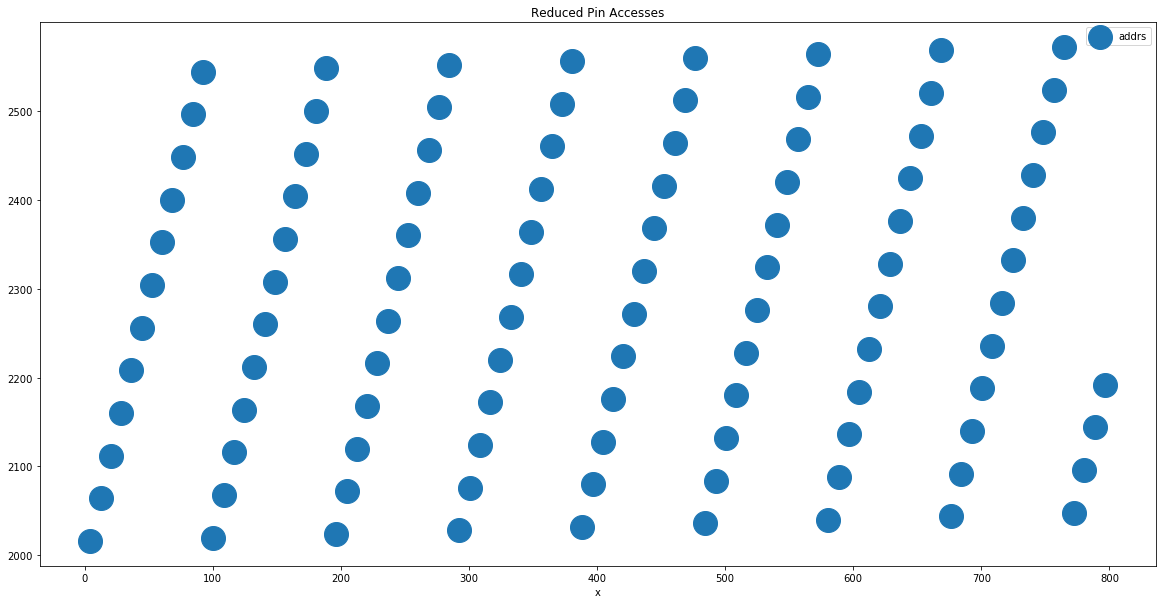

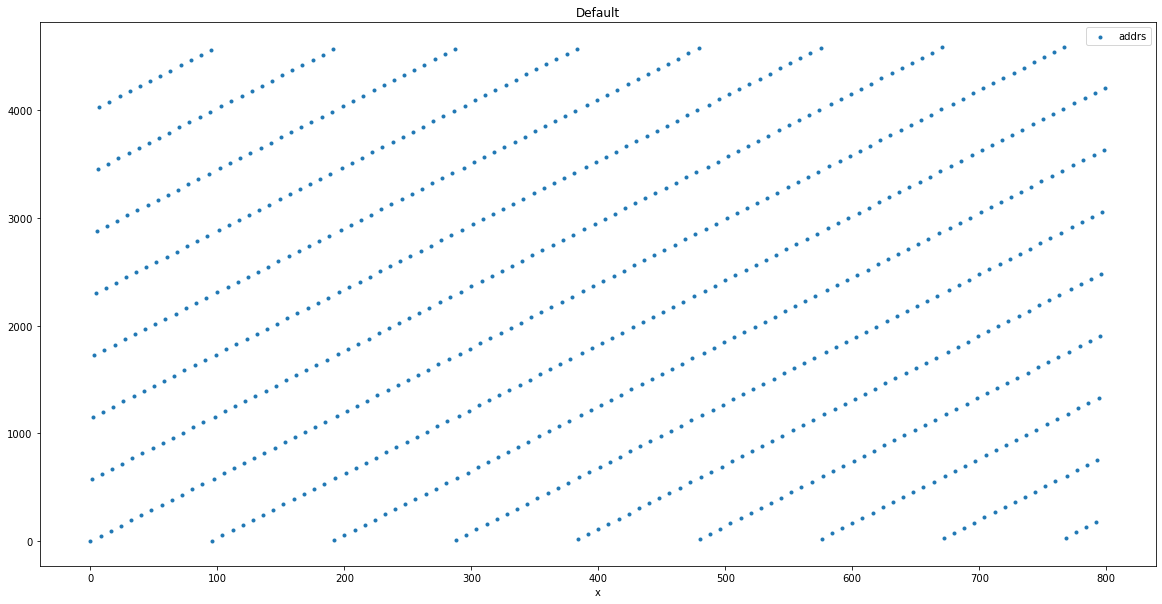

In [13]:
# Change to 8
sub_size = 8
chunks = len(npin_acc_min)//sub_size
npin_acc_min_g = [a.mean() for a in np.array_split(npin_acc_min, chunks)]
npin_amg_inds = [a.mean() for a in np.array_split(np.arange(1,len(npin_acc_min)), chunks)]

n = 100
plot_stuff(npin_acc_min_g, n, inds=npin_amg_inds, sub_size=sub_size, title='Reduced Pin Accesses')
plot_stuff(npin_acc_min, n*sub_size, inds=list(range(n*sub_size)), sub_size=1, title='Default')

# KMeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
n=1000
X = np.array([npin_amg_inds[:n], npin_acc_min_g[:n]])
X = X.T

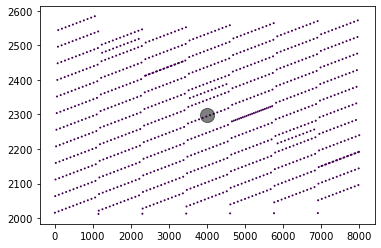

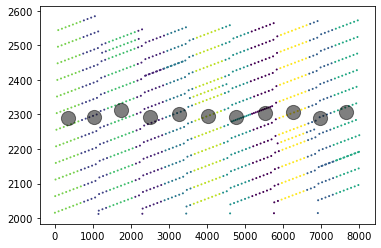

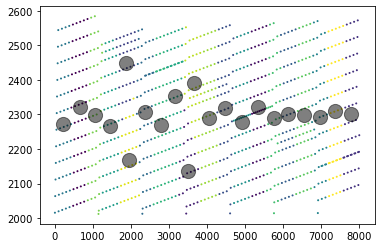

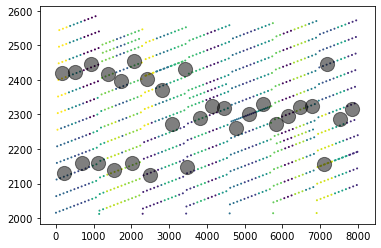

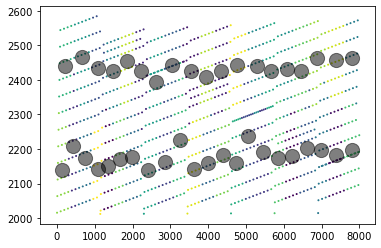

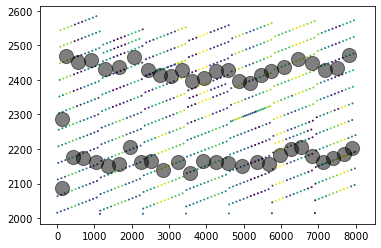

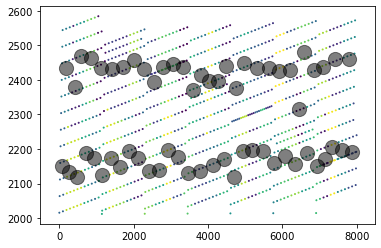

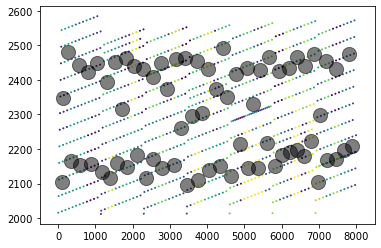

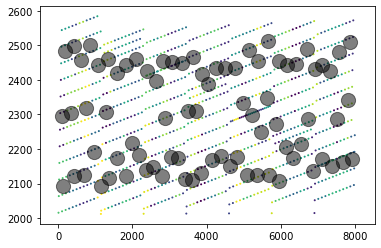

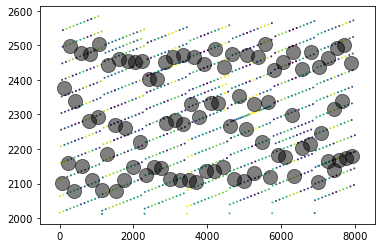

In [16]:
# num clusters 1 - 100 every 10
for k in range(1, 100, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1, cmap='viridis') # Graph all points according to their cluster
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # Cluster centers
    plt.show()

In [17]:
len(pin_acc)

87048

In [18]:
len(dump_acc)

56877